# Using a Neural Network to Predict Stock Prices

## Identify a Dataset


Source:

Yahoo Finance via yfinance library

https://pypi.org/project/yfinance/

## Tell us what you like/find interesting about that dataset. Why did you choose it?

### What I like

What I like about this dataset is that it contains all the stock information from yahoo finance.

Includes daily open, high, low, close prices, volume, and adjusted close prices. This wealth of information allows for a detailed analysis of stock market behavior.

Lots of years of data. Captures historical stock data which can show long term trends, patterns, and cycles in the stock market.

### What I find Interesting

What catches my interest in this dataset is its inclusive collection of stock information from Yahoo Finance. The dataset's extensive historical coverage becomes a valuable asset for analysis, offering insights into the evolving dynamics of the stock market.

## Provenance - Where did this dataset come from?

The dataset used for this analysis comes from Yahoo Finance, accessed through the yfinance library in Python. Yahoo Finance is a widely recognized and reliable source for financial data, providing information on stock prices. The yfinance library retrieves this data for further analysis as a library in python.

## Importing the Libraries

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

2024-01-19 07:51:15.028877: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-19 07:51:15.468341: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-19 07:51:15.468410: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-01-19 07:51:15.627437: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-19 07:51:18.322893: W tensorflow/stream_executor/platform/de

In [ ]:
company = '^GSPC'
start = dt.datetime(2014 , 1, 20)
end = dt.datetime(2024, 1, 1)
df = yf.download(company, start=start, end=end)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-21,1841.050049,1849.310059,1832.380005,1843.800049,1843.800049,3782470000
2014-01-22,1844.709961,1846.869995,1840.880005,1844.859985,1844.859985,3374170000
2014-01-23,1842.290039,1842.290039,1820.060059,1828.459961,1828.459961,3972250000
2014-01-24,1826.959961,1826.959961,1790.290039,1790.290039,1790.290039,4618450000
2014-01-27,1791.030029,1795.979980,1772.880005,1781.560059,1781.560059,4045200000
...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000


## Questions/hypotheses you want to explore

Can a Neural Network effectively predict stock prices?

How do the predicted prices compare to the actual prices? 

How well does the LSTM-based model perform in capturing stock price patterns?

## Data Analysis

In [ ]:
#Preparing Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

prediction_days = 60
x_train =[]
y_train = []

for i in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[i-prediction_days:i, 0])
    y_train.append(scaled_data[i,0])

x_train,y_train=np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
#Building the Model

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True,))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=15,batch_size=32)


Epoch 1/15
77/77 [==============================] - 45s 348ms/step - loss: 0.0218
Epoch 2/15
77/77 [==============================] - 27s 350ms/step - loss: 0.0038
Epoch 3/15
77/77 [==============================] - 27s 353ms/step - loss: 0.0037
Epoch 4/15
77/77 [==============================] - 27s 357ms/step - loss: 0.0036
Epoch 5/15
77/77 [==============================] - 27s 350ms/step - loss: 0.0031
Epoch 6/15
77/77 [==============================] - 27s 353ms/step - loss: 0.0028
Epoch 7/15
77/77 [==============================] - 27s 351ms/step - loss: 0.0028
Epoch 8/15
77/77 [==============================] - 27s 351ms/step - loss: 0.0027
Epoch 9/15
77/77 [==============================] - 27s 353ms/step - loss: 0.0024
Epoch 10/15
77/77 [==============================] - 27s 353ms/step - loss: 0.0027
Epoch 11/15
77/77 [==============================] - 27s 352ms/step - loss: 0.0025
Epoch 12/15
77/77 [==============================] - 27s 354ms/step - loss: 0.0024
Epoch 13/15
7

In [ ]:
#loading test data
test_start = dt.datetime(2024,1,1)
test_end = dt.datetime.now()
test_data = yf.download(company, start=test_start, end=test_end)

actual_prices = test_data['Close'].values
total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.transform(model_inputs)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#Make Predictions on Test Data
x_test=[]
for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

1/1 [==============================] - 4s 4s/step


## Statistical Model and Model Results 

In [ ]:

actual_prices = test_data['Close'].values

# Create a DataFrame for actual and predicted prices
results_df = pd.DataFrame({'Actual Prices': np.concatenate([df['Close'].values, actual_prices]),
                            'Predicted Prices': np.concatenate([np.full(len(df), np.nan), predicted_prices.flatten()])}, index=df.index.append(test_data.index))

# Display the results DataFrame
print("\nActual vs Predicted Prices:")
print(results_df.tail())


Actual vs Predicted Prices:
            Actual Prices  Predicted Prices
Date                                       
2024-01-11    4780.240234       4580.181641
2024-01-12    4783.830078       4581.404785
2024-01-16    4765.979980       4583.772461
2024-01-17    4739.209961       4586.574219
2024-01-18    4780.939941       4588.822754


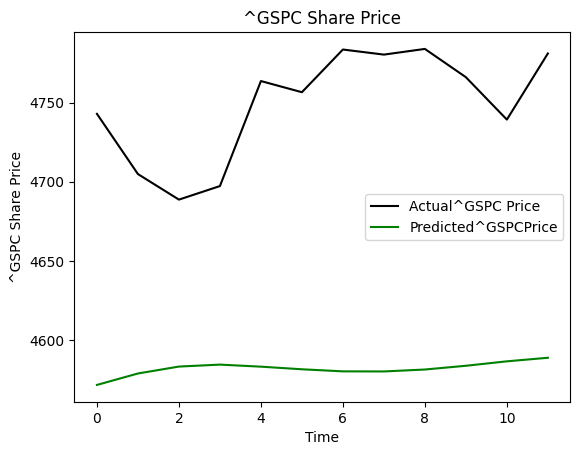

In [ ]:
#plotting the test predictions
plt.plot(actual_prices, color="black", label =f"Actual{company} Price")
plt.plot(predicted_prices, color='green', label = f"Predicted{company}Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()

In [ ]:
#predicting future days
real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction:{prediction}")

1/1 [==============================] - 4s 4s/step
Prediction:[[4591.1045]]


## Conclusion

I think this was a interesting dataset because it shows how data analysis can be applied to a real life setting. Using machine learning models (Long Short-Term Memory (LSTM)-based Neural Network), we were able to predict stock prices along with comparing those values with the real information. Although these models may not provide the most accurate predictions of the market,, they offer valuable insights into the potential application of data analysis and machine learning in real-life scenarios. The LSTM-based Neural Network utilized in this project demonstrated its capability to capture patterns and trends within historical stock data. While it's essential to acknowledge that predicting market behavior is inherently challenging due to its dynamic nature and external influences, the project serves as a noteworthy example of leveraging advanced technologies to gain a deeper understanding of financial data. The outcomes, even if not perfect, contribute to the ongoing exploration of how machine learning can be a beneficial tool in the domain of stock market analysis and decision-making processes.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=971cf8cc-024f-473a-bc25-d1607d82b361' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>